# CS 4662 Project - Gender Classification 👨 👩

## Team Members:
- Brandon Gonzalez
- Mark Kalaiji
- Joaquin Robles

In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading the .csv and seeing its size
gender_df = pd.read_csv('attributes.csv')
gender_df.shape

(20259, 42)

In [3]:
# since image pool is too large to compute it was scaled down to 1000 images
gender_df = gender_df.iloc[:1000,:] # want first 1000 rows, and all columns
gender_df.shape

(1000, 42)

In [4]:
# seeing what features the columns provide
gender_df.head()

,Unnamed: 0,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,50733,050734.jpg,-1,-1,1,-1,-1,1,1,-1,...,-1,1,-1,1,-1,-1,-1,-1,-1,1
1,88879,088880.jpg,-1,-1,1,-1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1
2,137280,137281.jpg,-1,-1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
3,119289,119290.jpg,-1,-1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,28943,028944.jpg,1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [5]:
# feature matrix and label vector
X = gender_df[['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']]
y = gender_df['Male']

In [6]:
# split data set into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# seperate train and test for features for CNN
X_train_cnn = X_train
X_test_cnn = X_test

# telling train and test to only use all columns after the index and all rows
X_train = X_train.iloc[:,1:] # : want all rows / ,1: all columns after first index
X_test = X_test.iloc[:,1:]

# Decision Tree

## Decision Tree Accuracy

In [7]:
from sklearn.tree import DecisionTreeClassifier
gender_dt = DecisionTreeClassifier(random_state=2)

# training on training set
gender_dt.fit(X_train, y_train)
# testing on testing set
y_predict_dt = gender_dt.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, y_predict_dt)
print('Decision Tree Accuracy:', accuracy_dt*100,'%')

Decision Tree Accuracy: 89.0 %


## Decision Tree Area Under Curve

In [8]:
# predict probability of 'Male'
y_predict_prob_dt = gender_dt.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics
fpr_dt, tpr_dt, thresholds = metrics.roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)

# auc
AUC_dt = metrics.auc(fpr_dt, tpr_dt)
print('AUC Decision Tree =',AUC_dt*100,'%')

AUC Decision Tree = 89.09414340448824 %


## Decision Tree ROC Curve

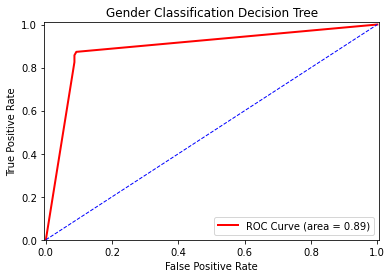

In [9]:
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_dt)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification Decision Tree')
plt.legend(loc="lower right")

plt.show()

# SVM

## SVM Accuracy

In [10]:
from sklearn.svm import SVC
gender_svm = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1, probability=True)

# training on training set
gender_svm.fit(X_train, y_train)
# testing on testing set
y_predict_svm = gender_svm.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, y_predict_svm)
print('SVM Accuracy:', accuracy_svm*100,'%')

SVM Accuracy: 91.33333333333333 %


## SVM Area Under Curve

In [11]:
# predict probability of 'Male'
y_predict_prob_svm = gender_svm.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, y_predict_prob_svm[:,1], pos_label=1)

# auc
AUC_svm = metrics.auc(fpr_svm, tpr_svm)
print('AUC SVM =',AUC_svm*100,'%')

AUC SVM = 97.82430213464696 %


## SVM ROC Curve

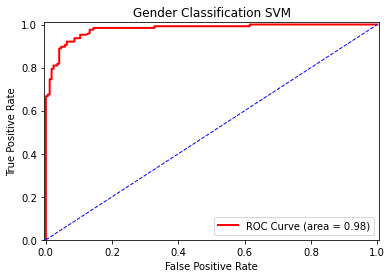

In [12]:
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_svm)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification SVM')
plt.legend(loc="lower right")

plt.show()

# Random Forest

### Random Forest Accuracy

In [13]:
from sklearn.ensemble import RandomForestClassifier
gender_rf = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

# training on training set
gender_rf.fit(X_train, y_train)
# testing on testing set
y_predict_rf = gender_dt.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_predict_rf)
print('Random Forest Accuracy:', accuracy_rf*100,'%')

Random Forest Accuracy: 89.0 %


### Random Forest Area Under Curve

In [14]:
# predict probability of 'Male'
y_predict_prob_rf = gender_rf.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)

# auc
AUC_rf = metrics.auc(fpr_rf, tpr_rf)
print('AUC Random Forest =',AUC_rf*100,'%')

AUC Random Forest = 97.77412880861156 %


### Random Forest ROC Curve

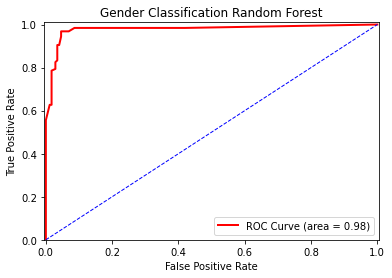

In [15]:
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_rf)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification Random Forest')
plt.legend(loc="lower right")

plt.show()

# Ada Boost

## Ada Boost Accuracy

In [16]:
from sklearn.ensemble import AdaBoostClassifier
gender_adb = AdaBoostClassifier(n_estimators=29,random_state=2)

# training on training set
gender_adb.fit(X_train, y_train)
# testing on testing set
y_predict_adb = gender_adb.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_adb = accuracy_score(y_test, y_predict_adb)
print('Ada Boost Accuracy:', accuracy_adb*100,'%')

Ada Boost Accuracy: 92.66666666666666 %


## Ada Boost Area Under Curve

In [17]:
# predict probability of 'Male'
y_predict_prob_adb = gender_adb.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics
fpr_adb, tpr_adb, thresholds = metrics.roc_curve(y_test, y_predict_prob_adb[:,1], pos_label=1)

# auc
AUC_adb = metrics.auc(fpr_adb, tpr_adb)
print('AUC Ada Boost =',AUC_adb*100,'%')

AUC Ada Boost = 97.99990877577085 %


## Ada Boost ROC Curve

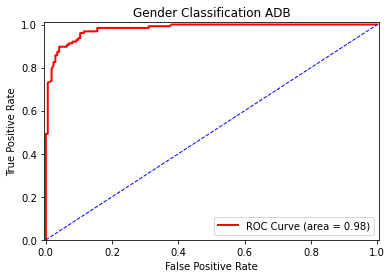

In [18]:
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve
plt.plot(fpr_adb, tpr_adb, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_adb)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification ADB')
plt.legend(loc="lower right")

plt.show()

# XGBoost

## XGBoost Accuracy

In [19]:
from xgboost import XGBClassifier
gender_xgb = XGBClassifier(n_estimators = 29,random_state=2)

# training on training set
gender_xgb.fit(X_train, y_train)
# testing on testing set
y_predict_xgb = gender_xgb.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_xgb = accuracy_score(y_test, y_predict_xgb)
print('XGBoost Accuracy:', accuracy_xgb*100,'%')

[15:15:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy: 93.66666666666667 %


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## XGBoost Area Under Curve

In [20]:
# predict probability of 'Male'
y_predict_prob_xgb = gender_xgb.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics
fpr_xgb, tpr_xgb, thresholds = metrics.roc_curve(y_test, y_predict_prob_xgb[:,1], pos_label=1)

# auc
AUC_xgb = metrics.auc(fpr_xgb, tpr_xgb)
print('AUC XGBoost =',AUC_xgb*100,'%')

AUC XGBoost = 98.05692391899288 %


## XGBoost Roc Curve

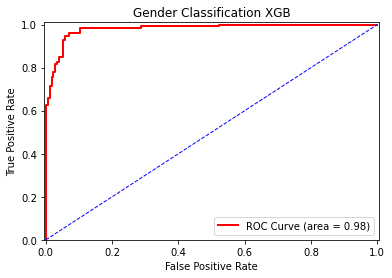

In [21]:
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_xgb)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification XGB')
plt.legend(loc="lower right")

plt.show()

# Logistic Regression

## Logistic Regression Accuracy

In [22]:
from sklearn.linear_model import LogisticRegression
gender_lgr = LogisticRegression()

# training on training set
gender_lgr.fit(X_train, y_train)
# testing on testing set
y_predict_lgr = gender_lgr.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_lgr = accuracy_score(y_test, y_predict_lgr)
print('Logistic Regression Accuracy:',accuracy_lgr*100,'%')

Logistic Regression Accuracy: 92.66666666666666 %


## Logistic Regression Area Under Curve

In [23]:
# predict probability of 'Male'
y_predict_prob_lgr = gender_lgr.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics
fpr_lgr, tpr_lgr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lgr[:,1], pos_label=1)

# auc
AUC_lgr = metrics.auc(fpr_lgr, tpr_lgr)
print('AUC Logistic Regression=',AUC_lgr*100,'%')

AUC Logistic Regression= 98.10709724502829 %


## Logistic Regression ROC Curve

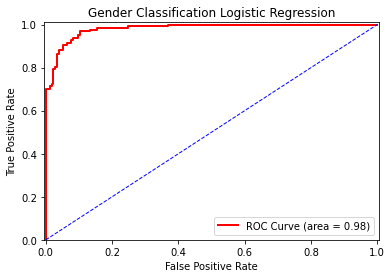

In [24]:
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve:
plt.plot(fpr_lgr, tpr_lgr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_lgr)

# random guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification Logistic Regression')
plt.legend(loc="lower right")

plt.show()

# KNN

## KNN Accuracy

In [25]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
gender_knn = KNeighborsClassifier(n_neighbors=k)

# training on training set
gender_knn.fit(X_train, y_train)
# testing on testing set
y_predict_knn = gender_knn.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_predict_knn)
print('KNN Accuracy:',accuracy_knn*100,'%')

KNN Accuracy: 88.66666666666667 %


## KNN Area Under Curve

In [26]:
# predict probability of 'Male'
y_predict_prob_knn = gender_knn.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics
fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test, y_predict_prob_knn[:,1], pos_label=1)

# auc
AUC_knn = metrics.auc(fpr_knn, tpr_knn)
print('AUC KNN:',AUC_knn*100,'%')

AUC KNN: 93.32238642583471 %


## KNN ROC Curve

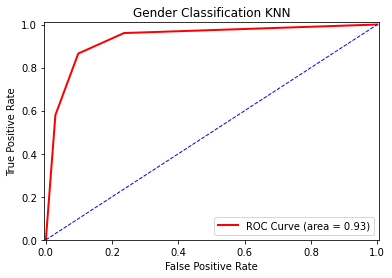

In [27]:
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve:
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_knn)

# random guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification KNN')
plt.legend(loc="lower right")

plt.show()

# Final Predictions

In [28]:
# final predictions for all algorithms
predictions_df = pd.DataFrame()

predictions_df['Random Forest'] = y_predict_rf
predictions_df['Decision Tree'] = y_predict_dt
predictions_df['SVM'] = y_predict_svm
predictions_df['Ada Boost'] = y_predict_adb
predictions_df['XGBoost'] = y_predict_xgb
predictions_df['Logistic Regression'] = y_predict_lgr
predictions_df['KNN'] = y_predict_knn


predictions_df

,Random Forest,Decision Tree,SVM,Ada Boost,XGBoost,Logistic Regression,KNN
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
2,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1
4,1,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
295,1,1,1,1,1,1,1
296,1,1,1,1,1,1,1
297,1,1,1,1,1,1,1
298,-1,-1,-1,-1,-1,-1,-1


In [29]:
# mode of all predictions per image
predictions_df.mode(axis = 1)

# if value is 1, mode of all algorithms voted 'male' / if value is 0, mode of all algorithms voted 'female'

,0
0,1
1,1
2,-1
3,-1
4,-1
...,...
295,1
296,1
297,1
298,-1


In [30]:
# do voting based on convolution and classic machine learning

# CNN

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

## Image Demo

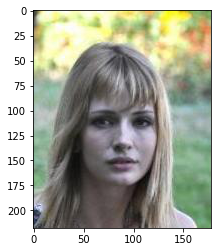

In [32]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imageDemo = mpimg.imread('/Users/markkalaiji/Desktop/faces/000653.jpg')
imgplot = plt.imshow(imageDemo, cmap=plt.cm.gray)
plt.show()

# did you print out the pictures the algoirthm got wrong?

In [33]:
# get pixel dimensions and color scale
imageDemo.shape

(218, 178, 3)

In [34]:
# get size of train and test
print(X_train_cnn.shape)
print(X_test_cnn.shape)
X_train_cnn.head()['image_id']

(700, 40)
(300, 40)


90     050758.jpg
305    185785.jpg
126    122417.jpg
963    036938.jpg
163    057854.jpg
Name: image_id, dtype: object

## Traverse Images

In [35]:
# make a list to store the images for training
face_list_train = []

for image_name in X_train_cnn['image_id']: # distribution of label is uneven since only 1000 images so it couldn't see if male or female
#     train_list = []
    curr_image = mpimg.imread('/Users/markkalaiji/Desktop/faces/' + image_name)
    
    face_list_train.append(curr_image)

In [36]:
# make a list to store the images for testing
face_list_test = []

for image_name in X_test_cnn['image_id']: # distribution of label is uneven since only 1000 images so it couldn't see if male or female
#     test_list = []
    curr_image = mpimg.imread('/Users/markkalaiji/Desktop/faces/' + image_name)
    
    face_list_test.append(curr_image)

In [37]:
# make 
face_list_train = np.asarray(face_list_train)
face_list_test = np.asarray(face_list_test)

print(face_list_train.shape)
print(face_list_test.shape)

(700, 218, 178, 3)
(300, 218, 178, 3)


## Create CNN

In [61]:
# create sequential object
model = Sequential()

In [62]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(218,178,3))) # 218 rows, 178 columsn, 3 colors rgb - same as image_demo
print(model.output_shape)

(None, 216, 176, 32)


In [63]:
# more hidden layers
model.add(Convolution2D(32, (3, 3), activation='relu'))
print(model.output_shape)

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# dropout layer to avoid overfitting
model.add(Dropout(0.25)) 

(None, 214, 174, 32)
(None, 107, 87, 32)


In [64]:
# output fully connected dense layers 
# makes 2D matrix 1D 
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) #
print(model.output_shape)

(None, 297888)
(None, 128)
(None, 2)


## Compile Model

In [65]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')

print(model.summary())
print(y)
print(X_train.shape)
y_train.shape

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 216, 176, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 214, 174, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 107, 87, 32)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 107, 87, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 297888)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               38129792  
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

(700,)

## One-Hot Encode Label

In [66]:
# for loop to iterate through training if not one append to zero
# because -1 and 1 changed to 0 and 1
new_label_train = []

for label_train in y_train:
    if label_train == -1:
        new_label_train.append(0)
        
    else:
        new_label_train.append(label_train)
    

new_label_test = []

for label_test in y_test:
    if label_test == -1:
        new_label_test.append(0)
        
    else:
        new_label_test.append(label_test)
        
        
print(new_label_train)
print(new_label_test)


from numpy import array
from numpy import argmax
from keras.utils import to_categorical

# one hot encode y_train
encoded_train = to_categorical(new_label_train)
print(encoded_train)
# invert encoding
inverted = argmax(encoded_train[0])
print(inverted)

# one hot encode y_test
encoded_test = to_categorical(new_label_test)
print(encoded_test)
# invert encoding
inverted_test = argmax(encoded_test[0])
print(inverted_test)

# print(inverted.shape)
# print(y_train)
print(encoded_train)
print(encoded_test)
# y_train.mean()

[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 

In [67]:
history = model.fit(face_list_train, encoded_train, batch_size=8, epochs=3, verbose=1)

Epoch 1/3
88/88 [==============================] - 36s 399ms/step - loss: 954.9345 - accuracy: 0.5594
Epoch 2/3
88/88 [==============================] - 36s 414ms/step - loss: 0.4943 - accuracy: 0.8279
Epoch 3/3
88/88 [==============================] - 35s 399ms/step - loss: 0.3330 - accuracy: 0.9062


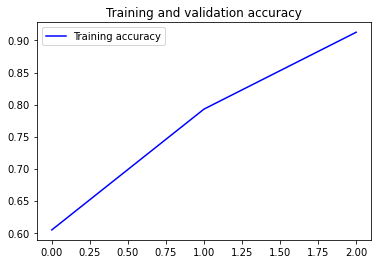

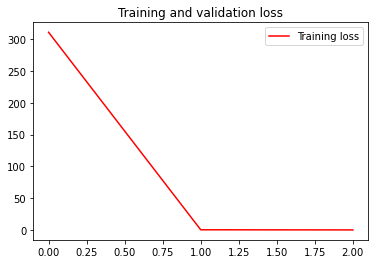

In [68]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['accuracy']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

## Testing

In [69]:
predicted_classes = model.predict_classes(face_list_test)
print(face_list_test.shape)
print(predicted_classes.shape)
# print(face_list_test)
# print(encoded_test)
print(y_test)

(300, 218, 178, 3)
(300,)
37     1
726    1
846   -1
295   -1
924   -1
      ..
894    1
540    1
567   -1
641   -1
129    1
Name: Male, Length: 300, dtype: int64


In [70]:
print(predicted_classes)

[1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1
 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1
 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1]


In [71]:
# Testing:
score = model.evaluate(face_list_test, encoded_test, verbose=1)
# print('The accuracy is: ', score[1])
score

10/10 [==============================] - 3s 241ms/step - loss: 0.7305 - accuracy: 0.7100


[0.7305211424827576, 0.7099999785423279]